# Welcome!

![](img/logos.png)

Code, data, and installation guide [http://www.rebekahesmaili.com/workshop.html](http://www.rebekahesmaili.com/workshop.html)

# Introduction

![](img/xkcd-python.png)

## Why Python?

Pros

* General-purpose, cross-platform  
* Free and open source  
* Reasonably easy to learn, good statistical and visualization packages/modules  
* Forces good syntax  
* Reads satellite data formats like HDF, NetCDF, GRIB 


Cons

* Performance penalties for interpretted languages  
* Packages are a "black box" and can be discontinued  

---

## Objective

* You won't learn how to code in Python
* You will learn to:
	* Read/write ascii data
	* Basic plotting and visualization
	* Saving files and data
* By the end of this class, you should be able to __analyze and visualize satellite datasets.__
    
---

Python is an interpretted language, so you as minimum you need to have Python on your computer.

## What is Anaconda?

* Anaconda is a package manager
* Comes bundled with Python, a lot of useful scientific/mathematical packages, and development environments.
* Easiest place to start if you new

## Development environments

* Spyder: most Matlab-like
* Jupyter notebooks: web based. Similar to Mathematica, runs code inline
* Text editor + run with command line for scripting

---
## Launching Jupyter Notebook

### Linux/Mac

* Open terminal, **cd to the directory where you have your notebooks and data**, and type:
```
jupyter notebook    
```

### Windows

* Start &rarr; Anaconda3 &rarr; Jupyter Notebook


## Jupyter Home Screen

* This will launch your default web browser with a local webserver that displays the contents of the directory that you're working in.

* Note: in all the examples, the path assumed that jupyter is launched from the notebook directory. You will need to change the path to point to your data if this is different.

* Click on New on the top right.

![](img/jn-screenshot.png)

<div class="alert alert-block alert-info">

<b> Exercise 1: Set-up your environment and create a notebook </b>

* For your opertating system, launch Jupyter Notebooks
* Create a new notebook
* Change the name from "untitled" to something better
* Save in the __same directory as the data folder__ that we provided (or move the data directory to the same place at the file because we'll need it later!).

</div>

# Very basic python commands

In [19]:
# This is a comment
print("hello world")

hello world


In [20]:
# This is an array 
a = [1,2,3,4,5,6]

In [21]:
# This will show me the array 
print(a)

[1, 2, 3, 4, 5, 6]


In [22]:
# So will this test
a

[1, 2, 3, 4, 5, 6]

In [23]:
# Is this what you expected to happen?
a*2

[1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6]

* Math didn't "happen" because it was a list, not a number array or matrix.
* Need to use an additional package to do matrix operations

## Importing Packages
Packages give us additional functionality, saving us the trouble of writing procedures ourselves. There are ~6000 packages in the [conda-forge repository](https://anaconda.org/conda-forge/repo) alone!

Today we'll discuss:

* [NumPy](http://www.numpy.org/) Fast mathematical operations on large datasets.
* [Pandas](https://pandas.pydata.org) Encapsulation of data, easy read/write of ascii data. Builds extra functionality on top of NumPy.
* [Matplotlib](https://matplotlib.org) Primarily python plotting/visualization package. You can generate plots, histograms, scatterplots, etc., with just a few lines of code.
* [Cartopy](https://scitools.org.uk/cartopy/) Package designed for geospatial data processing in order to produce maps and other geospatial data analyses.

In [24]:
import numpy as np

### NumPy

* Defining Arrays
* Array operations

In [25]:
# Convert a to a numpy array
a = np.array(a)

# Now that a is a numpy array, multiply each element x2
a*2

array([ 2,  4,  6,  8, 10, 12])

In [26]:
b = a.reshape(3,2)

# Sum vertically downwards across rows (axis 0)
b.sum(axis=0)

array([ 9, 12])

In [27]:
# Get the minimum horizontally across columns (axis 1)
b.max(axis=0)

array([5, 6])

In [28]:
# Boolean operations
b>1

array([[False,  True],
       [ True,  True],
       [ True,  True]])

For more examples, work through the: [Numpy Quickstart](https://docs.scipy.org/doc/numpy/user/quickstart.html)

### Pandas
* A library that helps encapsulate data
* Comparable to data frames in R, structures in IDL, namespaces in C++ and modern Fortran

Pros:

* You can name columns and refence by labels instead of indices like in numpy arrays
* This also makes performing group operations easier and more readable

Cons:

* Pandas is a wrapper for NumPy, so there is some efficiency overhead
* NumPy arrays are better for referencing datasets > 2D

In [29]:
import pandas as pd

# Working with Data
## Case Study: 2018 California Camp Fire from Space

* A forest fire began on __Nov 8, 2018__ and burned for 17 days had burned over a 621 km${^2}$ area.
* Caused by very low regional humidity due to strong gusting wind events and very dry surface
* The smoke from the fire also had an impact on regional air quality.
* We'll look at satellite observations from JPSS show the __fire location__ and the impact of the California wildfires had on __gases__ like CO, Ozone, and __Aerosol Optical Depth (AOD)__.

## Emmitted gases (carbon monoxide, ozone) and environment (water vaper)

* Providing an ascii file that extracts key variables from the NUCAPS sounding dataset
* Atmospheric sounding/profiling is a measurement of vertical distribution of physical properties of the atmospheric column such as pressure, temperature, liquid water content, ozone concentration, pollution, and other properties.
* Remote sensing soundings generally use passive infrared and microwave radiometers
* More information: https://www.star.nesdis.noaa.gov/jpss/soundings.php

In [30]:
# Import dataset containing trace gases at 850mb and 500mb pressure levels.
fname = 'data/campfire-gases-2018-11.csv'
gases = pd.read_csv(fname)

**Note: If you are getting errors!** 

Check the path in the home tab in your browser, it must be relative to the where jupyter was initially launched.

In [31]:
# Show column names
list(gases)

['Latitude',
 'Longitude',
 'Time',
 'H2O_MR_500mb',
 'H2O_MR_850mb',
 'CO_MR_500mb',
 'CO_MR_850mb',
 'O3_MR_500mb',
 'O3_MR_850mb',
 'CH4_MR_500mb',
 'CH4_MR_850mb',
 'N2O_MR_500mb',
 'N2O_MR_850mb',
 'CO2_500mb',
 'CO2_850mb',
 'datetime']

<div class="alert alert-block alert-info">

<b>Exercise 2: Import an ascii file </b>

* From the data folder, import the a dataset "VIIRSNDE_global2018312.v1.0.txt" which is a dataset containing the global location of fires for Nov 8, 2018. 
* Use the pandas read_csv command. Assign it to a variable.
    * HINT: You might need to check out the file path with respect to your notebook location.
* What are the column names?
</div>

In [32]:
# SOLUTION
fname = 'data/VIIRSNDE_global2018312.v1.0.txt'
fires = pd.read_csv(fname)

### Basic Plotting with MatplotLib

Common (simple) tasks in Earth science...

* Time series
* Computing dataset mean
* Creating maps

In [33]:
# Matplotlib
from matplotlib import pyplot as plt

# Options to print figures into notebook/increase size
# Only necessary for jupyter notebooks
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams.update({'font.size': 16})

#### Time series data

Need to tell python the date strings in the file are dates/times.

In [34]:
# Convert the string dates and times to date format (Note: \ continues to new line)
fmt = '%Y-%m-%d %H:%M:%S'
gases['datetime'] = pd.to_datetime(gases['datetime'], format=fmt)

#### Plotting a single variable

* Add the data using plt.plot('X Column Name', 'Y Column Name')

In [2]:
plt.plot(gases['datetime'], gases['H2O_MR_850mb'])
plt.title('All observations within 300km')
#plt.xticks(rotation=35)
plt.show()

NameError: name 'plt' is not defined

<div class="alert alert-block alert-info">

**Exercise 3**


??? = Fill in the blank!

**Create a scatter plot**

* Import time series data from VIIRSNDE_global2018312.v1.0.txt from Exercise 2.
* Use the ???.scatter(???, ???) to create a plot mapping the latitude/longitude location of fires.
</div>

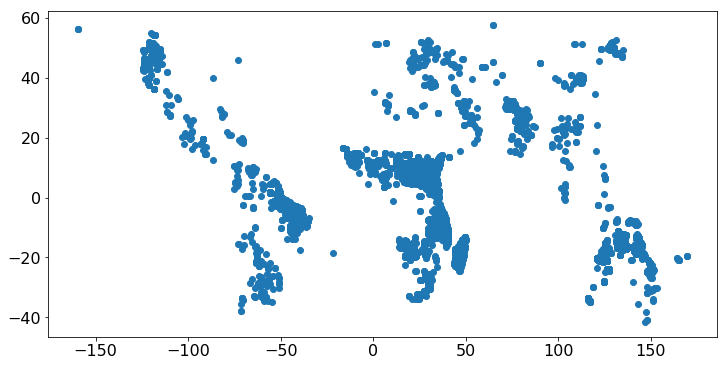

In [37]:
# SOLUTION
plt.scatter(fires.Lon, fires.Lat)
plt.show()

### Computing basic statistics
There are multiple observations per day in the gases plot - might be useful to only look at daily avergae.
* In pandas, the 'groupby' command passes the column name to perform an operation on.
* Chain another command telling it what operation to person (e.g. mean, standard deviation, or your own defined function)

In [38]:
dailyAvg = gases.groupby(gases.datetime.dt.day).mean()

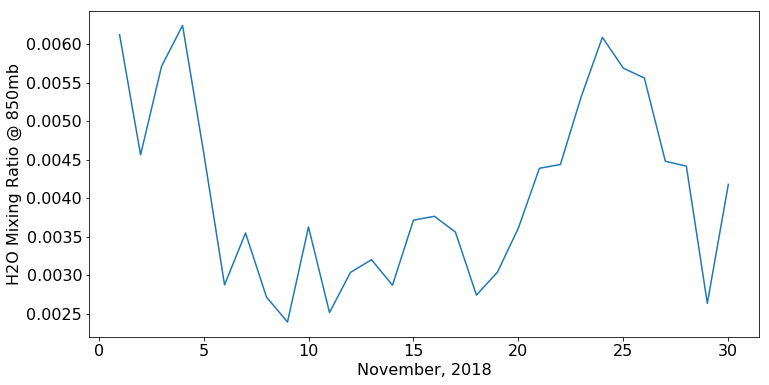

In [39]:
plt.plot(dailyAvg.index, dailyAvg['H2O_MR_850mb'])
#plt.scatter(dailyAvg.index, dailyAvg['H2O_MR_850mb'])

plt.xlabel("November, 2018")
plt.ylabel("H2O Mixing Ratio @ 850mb")

plt.show()

#### Adding data to an existing plot

* Call plt.plot() and fill in the x and y variables for EACH line/data series on the plot
* Add in any aesthetics, such as rotating the axes, labels, and adding a legend
* Show the plot using plt.show()

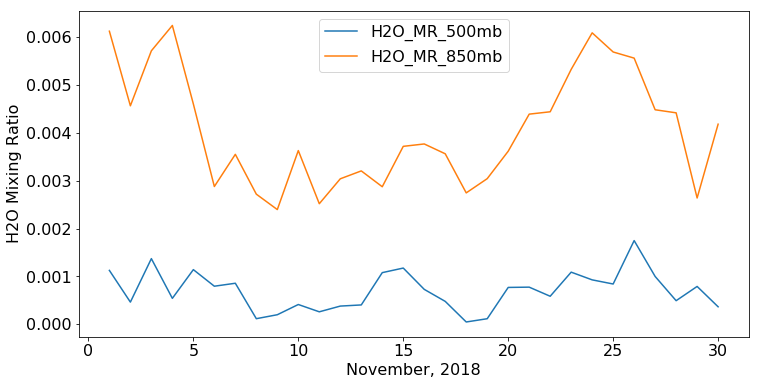

In [40]:
plt.plot(dailyAvg.index, dailyAvg['H2O_MR_500mb'])
plt.plot(dailyAvg.index, dailyAvg['H2O_MR_850mb'])

plt.xlabel("November, 2018")
plt.ylabel("H2O Mixing Ratio")

plt.legend()
plt.show()

#### Plotting two side-by-side plots

* Before writing your plt.plot code, add:
plt.subplot( __row number__ , __column number__ , __position of the plot__ )

* Call plt.plot() and fill in the x and y variables for the first line/data series on the plot
* Call plt.sunplot again, increment the position of plot number
* Add in any aesthetics, such as rotating the axes, labels, and adding a legend
* Show the plot using plt.show()

Example:

* plt.subplot(2,1,1) places the plot in the first position of a two row, one column stack of plots.
* plt.subplot(1,2,2) places the plot in the second position of a two column, one row of plots next to each other.

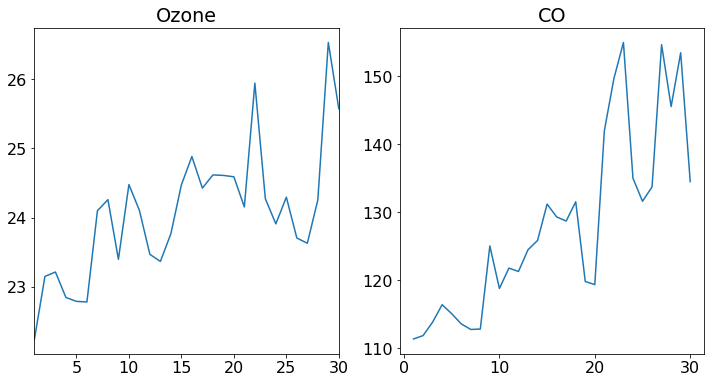

In [41]:
plt.subplot(1,2,1)
plt.plot(dailyAvg.index, dailyAvg.O3_MR_850mb)
plt.title('Ozone')
plt.xlim(1, 30)
#plt.legend()

plt.subplot(1,2,2)
plt.plot(dailyAvg.index, dailyAvg.CO_MR_850mb)
plt.title('CO')
plt.show()

### Creating maps from data

In exercise 3, we made a scatterplot showing where the fires are but wouldn't it be nice to see that on a map?
Basic maps only require a few extra lines of code.

## [Cartopy](https://scitools.org.uk/cartopy/)
* Cartopy is not included in Anaconda, need to install yourself.

Open the terminal (Mac/Linix) or Anaconda Prompt (Windows) and type:
```python
conda install -c conda-forge cartopy
```
* Rather than import all of Cartopy, we just want the projection classes to pair with matplot lib.
* More [map projections](https://scitools.org.uk/cartopy/docs/latest/crs/projections.html).

In [42]:
from cartopy import crs as ccrs

In [43]:
# In case you haven't imported it yet...we need it now!
fires = pd.read_csv("data/VIIRSNDE_global2018312.v1.0.txt")
fires.head()

,Lon,Lat,Mask,Conf,brt_t13(K),frp(MW),line,sample,Sat,YearDay,Hour
0,27.110006,30.769241,8,52,302.877533,5.814295,242,1735,NDE,2018312,1
1,26.083252,30.534357,9,100,332.959717,24.340988,301,1620,NDE,2018312,1
2,34.865997,28.162659,8,38,301.165985,6.107953,396,2589,NDE,2018312,1
3,34.872623,28.161121,8,71,307.277985,9.287819,396,2590,NDE,2018312,1
4,34.865070,28.158880,8,39,301.227783,6.001442,402,2590,NDE,2018312,1


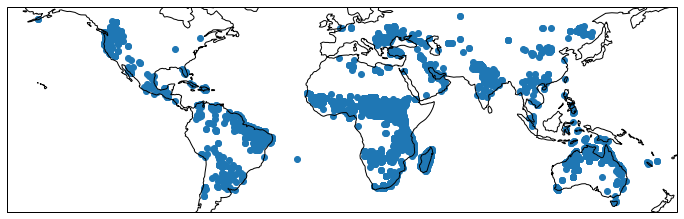

In [44]:
ax=plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.scatter(fires['Lon'], fires['Lat'])
plt.show()

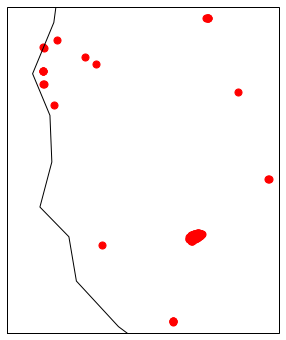

In [45]:
ax=plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.scatter(fires['Lon'], fires['Lat'], color='red', s=50)
plt.xlim(-125, -120)
plt.ylim(38, 44)
plt.show()

### Aerosol Optical Depth (AOD)
* Aerosols are particles suspended in the atmosphere, including dust, sea salt, volcanic ash, smoke, and pollution.
* AOD is a unitless measure of the amount of aerosols in the atmosphere.
* Low values indicate clear air, high values indicate lots of particles
* Measurements are obtained from the VIIRS instrument on the Suomi-NPP satellite.
* Data are stored in __netCDF__ or __HDF format__
* More information: https://www.star.nesdis.noaa.gov/jpss/aerosols.php

### netCDF Primer

* Hosted by the Unidata program at the University Corporation for Atmospheric Research (UCAR)
* NetCDF (Network Common Data Form) a set of software libraries and self-describing, machine-independent data formats
* Support the creation, access, and sharing of array-oriented scientific data

NOTE: We'll cover this more in more detail in the next workshop session!

In [46]:
from netCDF4 import Dataset

In [47]:
fname='data/JRR-AOD_v1r2_npp_s201811082130296_e201811082131537_c201811082228260.nc'
file_id_NPP = Dataset(fname)

In [48]:
aod = file_id_NPP.variables['AOD550'][:,:]
lat = file_id_NPP.variables['Latitude'][:,:]
lon = file_id_NPP.variables['Longitude'][:,:]

In [49]:
# Scaling the data from 0-1.8.
levs = np.arange(0, 1.8, 0.1)
img_proj = ccrs.PlateCarree()

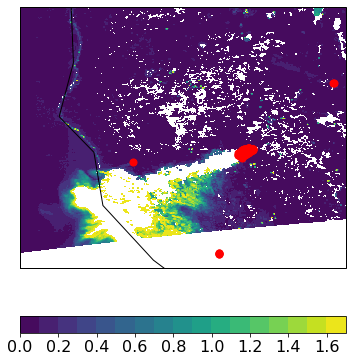

In [54]:
# Using cartopy, create the map projection and plot the data
ax = plt.axes(projection=img_proj)
ax.coastlines()

# Can change color scheme using the get_cmap command
x1 = plt.contourf(lon, lat, aod, levs, transform=img_proj)
plt.colorbar(x1, orientation="horizontal", fraction=0.05)
plt.scatter(fires['Lon'], fires['Lat'], color='red', s=50)

# To zoom in on data:
plt.xlim(-125, -120)
plt.ylim(38, 42)
plt.show()

### Saving

* You can right click and save on images
* Add __plt.savefig('pick_a_filename')__.
    * e.g. plt.savefig('CampFire.png')
    * NOTE: if you plt.show() BEFORE saving, nothing saves!
* Variables can be saved using __variablename.to_csv('filename.csv')__
    * e.g. DailyAvg.savefig('DailyAvgGases_Nov2018.csv')
* You also specify a path (e.g. /location/to/directory/), otherwise the save is in the directory that you launched jupyter notebook.

## Resources

### In-person through UMD/McKeldin Research Commons
* [Data Science Workshop Series](https://www.lib.umd.edu/rc/data-science)
* [All Workshops](https://www.lib.umd.edu/rc/workshops)
* [Statistical Consulting Service](https://www.lib.umd.edu/rc/statistical-consulting)

### Online tutorials
* Some (free!) ways to learn: 
    * [CS Dojo](https://www.youtube.com/watch?v=Z1Yd7upQsXY&list=PLBZBJbE_rGRWeh5mIBhD-hhDwSEDxogDg) Youtube series for absolute beginners
    * [Automate Boring Stuff](https://automatetheboringstuff.com)
    * [Codeacademy](https://www.codecademy.com/learn/learn-python)
    * [Local Meetups](https://www.meetup.com/find/tech/)
    
## Datasets

Searchable satellite data:

* [NOAA CLASS](https://www.avl.class.noaa.gov) Comprehensive Large Array-data Stewardship System (CLASS) is an electronic library of NOAA environmental data.
* [NASA MIRDOR](https://mirador.gsfc.nasa.gov) is an electronic library of NASA environmental data. Most NASA satellite data are stored here.
* [NASA Langley](https://eosweb.larc.nasa.gov) Atmospheric Science Data Center (ASDC) Distributed Active Archive Center (DAAC). Aerosols, clouds, radiation, and field campaign data.
* [EUMETSAT](https://www.eumetsat.int/website/home/Data/DataDelivery/OnlineDataAccess/index.html)

Other channels:

* [Amazon Web Services](https://registry.opendata.aws/?search=earth%20observation) has GOES-16 radiance, Landsat, MODIS, and more 
* [python-AWIPS](https://python-awips.readthedocs.io/en/latest/) Has a good repository of atmospheric datasets
* [Python Satellite Data Analysis Toolkit (pysat)](https://github.com/rstoneback) Can pull space science related datasets (e.g. COSMIC-1) 